# **CS310-Third Year Project: `Real-time Human Attribute Analysis Web Application`** 
---

# Exploratory Data Analysis (EDA) on _AffectNet_, _CK+_ and _FER2013_ Datasets

#### Author: *`Neema Raiyat`*

---

In [1]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

plt.style.use('ggplot')     # Style sheet used for plots

emo_dict = {
    1.0: 'Neutral',     # Class 001 - Neutral
    2.0: 'Happy',       # Class 002 - Happy
    3.0: 'Sad',         # Class 003 - Sad
    4.0: 'Surprise',    # Class 004 - Surprise
    5.0: 'Fear',        # Class 005 - Fear
    6.0: 'Disgust',     # Class 006 - Disgust
    7.0: 'Anger',       # Class 007 - Anger
    8.0: 'Contempt'     # Class 008 - Contempt
}

In [2]:
def plot_eda(df, data_partition=""):
    ax = df['emotion'].value_counts().sort_index() \
        .plot(kind='bar',
            title=f'Number of Samples in AffectNet {data_partition} data for each Emotion',
            figsize=(10, 5),
            color=mcolors.TABLEAU_COLORS)
    ax.set_xlabel('Emotion Classes')
    ax.set_ylabel('Number of Samples')
    plt.show()

In [3]:
# --------------------------------------------------------- #
# --------------------- TRAINING DATA --------------------- #
# --------------------------------------------------------- #
df_t = pd.read_csv('data/AffectNet/train-affectnet.csv')
df_t = df_t.drop(columns = 'iid')

for i in range(len(emo_dict)):
    df_t.loc[df_t['emotion'] == i+1, 'emotion'] = emo_dict[i+1]

# The class of emotion 'contempt' is removed since the models we aim to do not detect 'contempt'.
# One solution is to simply use 'contempt' as 'neutral', however, this will lead
# to overfitting on 'neutral'
df_t.drop(df_t[df_t['emotion'] == 'Contempt'].index, inplace=True)
df_t.reset_index(drop=True, inplace=True)


# ----------------------------------------------------------- #
# --------------------- VALIDATION DATA --------------------- #
# ----------------------------------------------------------- #
df_v = pd.read_csv('data/AffectNet/valid-affectnet.csv')
df_v = df_v.drop(columns = 'iid')

for i in range(len(emo_dict)):
    df_v.loc[df_v['emotion'] == i+1, 'emotion'] = emo_dict[i+1]

# The class of emotion 'contempt' is removed since the models we aim to do not detect 'contempt'.
# One solution is to simply use 'contempt' as 'neutral', however, this will lead
# to overfitting on 'neutral'
df_v.drop(df_v[df_v['emotion'] == 'Contempt'].index, inplace=True)
df_v.reset_index(drop=True, inplace=True)

---

# **AffectNet** Dataset

# EDA on `AffectNet` _Training_ Data

The plot below shows that there is an equal number of samples for each emotion. This will prevent overfitting on a particular emotion when training. However, `disgust` has slightly less samples (only 3803), meaning there will be some underfitting on images that show disgust.

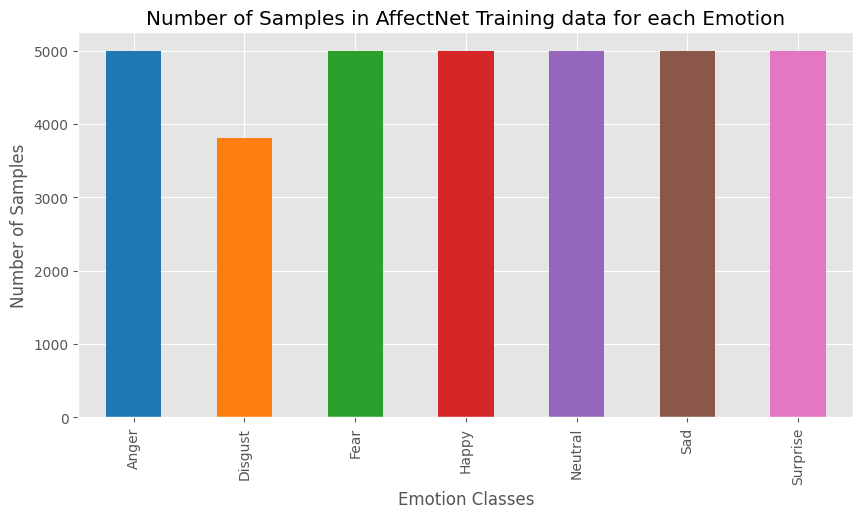

In [4]:
plot_eda(df_t, "Training")

# EDA on `AffectNet` _Validation_ Data

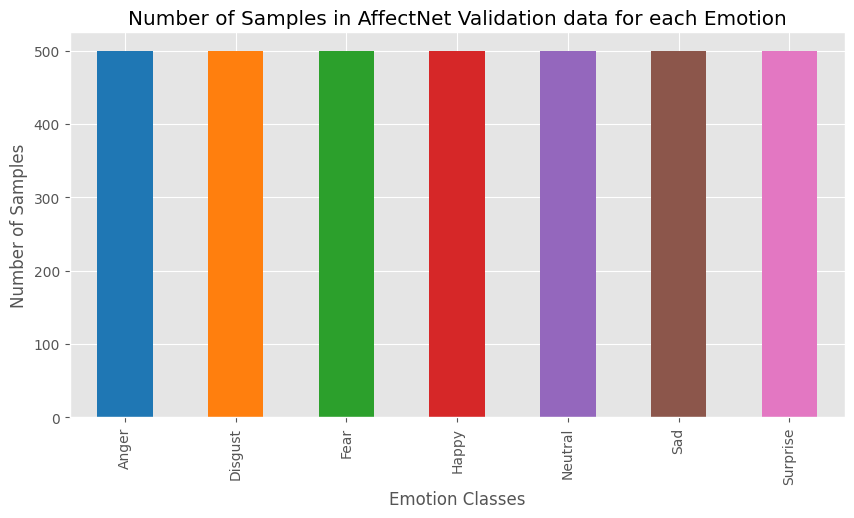

In [5]:
plot_eda(df_v, "Validation")

---

In [6]:
def count_images(directory):
    count = 0
    for filename in os.listdir(directory):
        _, ext = os.path.splitext(filename)             # Split the extension from the file name
        if ext in ['.jpg', '.jpeg', '.png', '.gif']:    # Check if the file is an image
            count += 1
    return count

In [7]:
def plot_eda(df, dataset_name):

    title = f'Number of Samples in {dataset_name} Data{"" if " " in dataset_name else "set"} for each Emotion'

    ax = df.plot(x=0,y=1, 
        kind ='bar', 
        title=title, 
        figsize=(10, 5), 
        color=mcolors.TABLEAU_COLORS)
        
    ax.set_xlabel('Emotion Classes')
    ax.set_ylabel('Number of Samples')
    ax.get_legend().remove()
    plt.show()

---
# **Extended Cohn-Kanade (CK+)** Dataset

# EDA on `Extended Cohn-Kanade (CK+)` Dataset

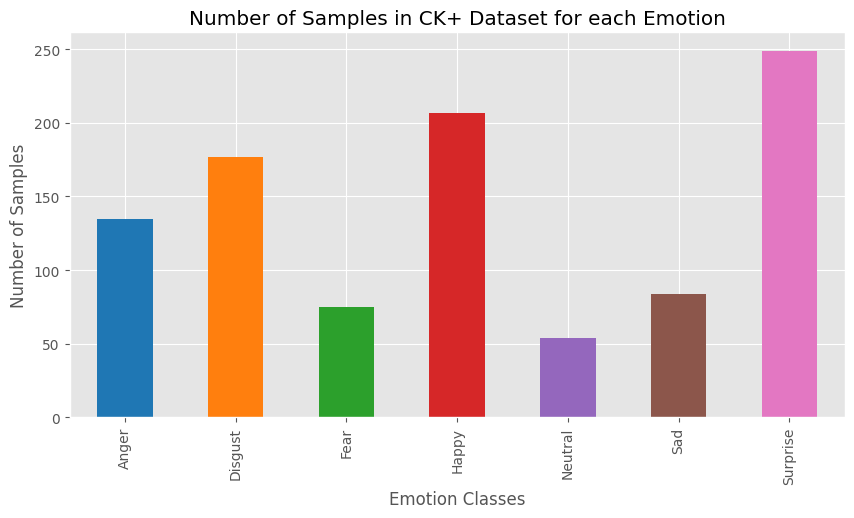

In [8]:
df = {
    'emotion'               : ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'],
    'Number of Samples'     : [count_images('data/CK+/anger'), 
                                count_images('data/CK+/disgust'), 
                                count_images('data/CK+/fear'), 
                                count_images('data/CK+/happy'),
                                count_images('data/CK+/neutral'),
                                count_images('data/CK+/sad'),
                                count_images('data/CK+/surprise')]
}
df = pd.DataFrame.from_dict(df)
plot_eda(df, 'CK+')

---

# **FER2013** Dataset

# EDA on `FER2013` _Training_ Data

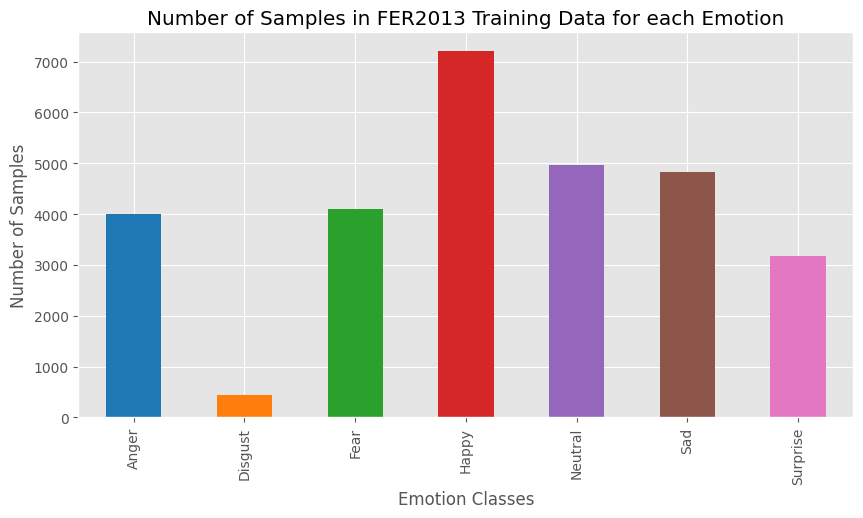

In [9]:
df = {
    'emotion'               : ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'],
    'Number of Samples'     : [count_images('data/FER2013/train/anger'), 
                                count_images('data/FER2013/train/disgust'), 
                                count_images('data/FER2013/train/fear'), 
                                count_images('data/FER2013/train/happy'),
                                count_images('data/FER2013/train/neutral'),
                                count_images('data/FER2013/train/sad'),
                                count_images('data/FER2013/train/surprise')]
}
df = pd.DataFrame.from_dict(df)
plot_eda(df, 'FER2013 Training')

* There is clearly severe underfitting on `Disgust`, and overfitting on `Happy`
* The rest of the emotion classes have approximately the same number of samples (+/- 25%)


# EDA on `FER2013` _Testing_ Data

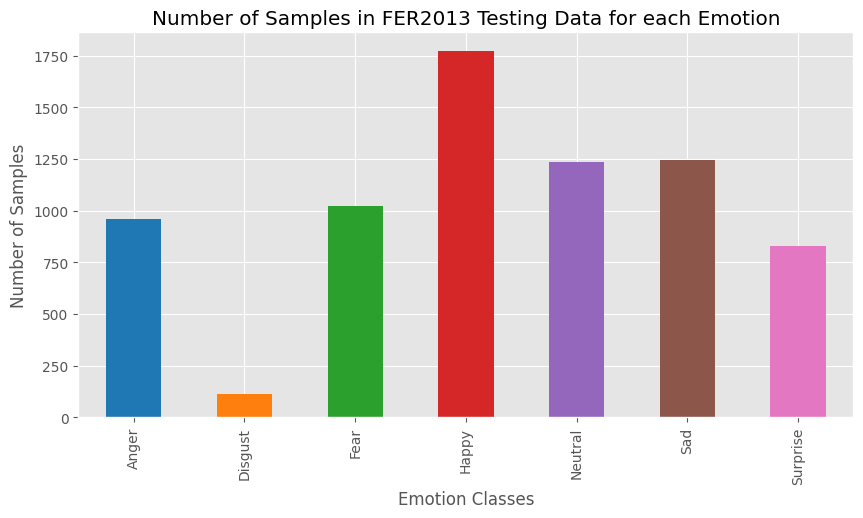

In [10]:
df = {
    'emotion'               : ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'],
    'Number of Samples'     : [count_images('data/FER2013/test/anger'), 
                                count_images('data/FER2013/test/disgust'), 
                                count_images('data/FER2013/test/fear'), 
                                count_images('data/FER2013/test/happy'),
                                count_images('data/FER2013/test/neutral'),
                                count_images('data/FER2013/test/sad'),
                                count_images('data/FER2013/test/surprise')]
}
df = pd.DataFrame.from_dict(df)
plot_eda(df, 'FER2013 Testing')

* The testing data follows the same distribution as the training data, and hence suffers from underfitting and overfitting in the same areas:
    * There is clearly severe underfitting on `Disgust`, and overfitting on `Happy`
    * The rest of the emotion classes have approximately the same number of samples (+/- 25%)


# **Summary**:

Below is a summary of the EDA on each partition of data discussed. Each partition lists emotion classes that were _underfitted_ or _overfitted_ and its severity (minor/major). Major is defined as having +/- >30% number of samples than the mean number of samples.

| *Dataset* | *Partition* | *Underfitted Classes* | *Overfitted Classes* |
| --- | --- | --- | --- |
|`AffectNet`  | Training     | Disgust (minor) | - |
|           | Validation   | - | - |
|`CK+`| All                    | Fear (**major**), Neutral (**major**), Sad (minor)    | Disgust (minor), Happy (**major**), Surprise (**major**)|
|`FER2013`    | Training       | Disgust (**major**)              | Happy (**major**) |
|           | Testing        | Disgust (**major**)             | Happy (**major**) |

### **Conclusion**:

Due to there being absolutely no overfitting, and only a small amount of underfitting, the `AffectNet` dataset seems to be the best to train models with.